<a href="https://colab.research.google.com/github/farid-hamid/FinalYearProjectFH/blob/main/BERTopic_Model_v3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
import string

In [3]:
import nltk

In [4]:
%pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=20dca77d831e7d2669d721f76e67c76489bb9dc5895c75fd4257aef7b1226a38
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [5]:
%pip install HDBSCAN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for HDBSCAN: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039279 sha256=2af8fb9277db063389ac7356af3da9acb951993bed970c21176be520199ee6a8
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built HDBSCAN
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.7
    Uninstalling Cython-3.0.7:
      Successfully uninstalled Cython-3.0.7


In [6]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/All subReddit Posts.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subReddit            644 non-null    object
 1   Date                 644 non-null    object
 2   Datetime             644 non-null    object
 3   Title                644 non-null    object
 4   Body Text            614 non-null    object
 5   Top Comment          643 non-null    object
 6   Top Comment Reply 1  389 non-null    object
 7   Top Comment Reply 2  96 non-null     object
 8   Top Comment Reply 3  31 non-null     object
 9   Top Comment Reply 4  15 non-null     object
dtypes: object(10)
memory usage: 50.4+ KB


In [7]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subReddit            644 non-null    object
 1   Date                 644 non-null    object
 2   Datetime             644 non-null    object
 3   Title                644 non-null    object
 4   Body Text            614 non-null    object
 5   Top Comment          643 non-null    object
 6   Top Comment Reply 1  389 non-null    object
 7   Top Comment Reply 2  96 non-null     object
 8   Top Comment Reply 3  31 non-null     object
 9   Top Comment Reply 4  15 non-null     object
dtypes: object(10)
memory usage: 50.4+ KB


In [8]:
data = df

In [9]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,05/12/2023,05/12/2023 23:25,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,Yep I’m in the same boat. My local pharmacy ch...,It's comparable to strips. I go through roughl...,NaN,NaN,NaN
1,diabetes_t2,20/12/2023,20/12/2023 05:13,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,"I don’t usually have this issue, but sometimes...",NaN,NaN,NaN,NaN
2,diabetes_t2,23/12/2023,23/12/2023 23:16,Frustrated with Libre 3,I just got off the phone with customer support...,The first twelve hours of readings are always ...,NaN,NaN,NaN,NaN
3,diabetes_t2,23/12/2023,23/12/2023 02:32,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,I had numbers like yours when I started the Li...,Thank you! You as well. I had no clue that I e...,NaN,NaN,NaN
4,diabetes_t2,07/12/2023,07/12/2023 16:34,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,here's more than you ever wanted to know about...,Thank you! That is very informative and just t...,NaN,NaN,NaN


In [10]:
n = len(data)

In [11]:
data.drop(['Date', 'Datetime'], axis=1)


,subReddit,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,Yep I’m in the same boat. My local pharmacy ch...,It's comparable to strips. I go through roughl...,NaN,NaN,NaN
1,diabetes_t2,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,"I don’t usually have this issue, but sometimes...",NaN,NaN,NaN,NaN
2,diabetes_t2,Frustrated with Libre 3,I just got off the phone with customer support...,The first twelve hours of readings are always ...,NaN,NaN,NaN,NaN
3,diabetes_t2,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,I had numbers like yours when I started the Li...,Thank you! You as well. I had no clue that I e...,NaN,NaN,NaN
4,diabetes_t2,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,here's more than you ever wanted to know about...,Thank you! That is very informative and just t...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
639,diabetes_t1,CGM and long flights,I recently flew from the east coast of the US ...,No. I doubt it’s from the travel. It’s just...,NaN,NaN,NaN,NaN
640,diabetes_t1,"People who don't have CGM & pump, how do you m...","People who don't own a CGM and a pump, and sti...",At least 8 finger sticks a day and a lot of wi...,My cgm fell off on day 2 of a week-long campin...,I agree that all diabetics should understand h...,100% couldn't agree more!!,"Full disclosure, I'm not a very good diabetic...."
641,diabetes_t1,CGM data on watchface thru BT,"hey y'all,\n\nI currently use a Google Pixel 3...",I have an iPhone with Dexcom G7 and a Garmin w...,NaN,NaN,NaN,NaN
642,diabetes_t1,Just got a CGM two days ago and I think I'm ob...,Every time I eat it spikes then immediately dr...,"Your not obsessing, your learning",I keep telling myself that but my screen time ...,NaN,NaN,NaN


In [12]:
#stage 1 lowercase
data['Title'] = data['Title'].str.lower()
data['Body Text'] = data['Body Text'].str.lower()
data['Top Comment'] = data['Top Comment'].str.lower()
data['Top Comment Reply 1'] = data['Top Comment Reply 1'].str.lower()
data['Top Comment Reply 2'] = data['Top Comment Reply 2'].str.lower()
data['Top Comment Reply 3'] = data['Top Comment Reply 3'].str.lower()
data['Top Comment Reply 4'] = data['Top Comment Reply 4'].str.lower()

In [13]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,05/12/2023,05/12/2023 23:25,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,yep i’m in the same boat. my local pharmacy ch...,it's comparable to strips. i go through roughl...,NaN,NaN,NaN
1,diabetes_t2,20/12/2023,20/12/2023 05:13,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,"i don’t usually have this issue, but sometimes...",NaN,NaN,NaN,NaN
2,diabetes_t2,23/12/2023,23/12/2023 23:16,frustrated with libre 3,i just got off the phone with customer support...,the first twelve hours of readings are always ...,NaN,NaN,NaN,NaN
3,diabetes_t2,23/12/2023,23/12/2023 02:32,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,i had numbers like yours when i started the li...,thank you! you as well. i had no clue that i e...,NaN,NaN,NaN
4,diabetes_t2,07/12/2023,07/12/2023 16:34,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,here's more than you ever wanted to know about...,thank you! that is very informative and just t...,NaN,NaN,NaN


In [14]:
data.fillna('', inplace=True)
data['Discussion'] = data.apply(lambda row: ' '.join(row[['Title', 'Body Text']].values), axis=1)

In [15]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion
0,diabetes_t2,05/12/2023,05/12/2023 23:25,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,yep i’m in the same boat. my local pharmacy ch...,it's comparable to strips. i go through roughl...,,,,cheapest way to get a cgm without insurance? w...
1,diabetes_t2,20/12/2023,20/12/2023 05:13,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,"i don’t usually have this issue, but sometimes...",,,,,libre 3 doesn’t stick i’ve used the libre 3 fo...
2,diabetes_t2,23/12/2023,23/12/2023 23:16,frustrated with libre 3,i just got off the phone with customer support...,the first twelve hours of readings are always ...,,,,,frustrated with libre 3 i just got off the pho...
3,diabetes_t2,23/12/2023,23/12/2023 02:32,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,i had numbers like yours when i started the li...,thank you! you as well. i had no clue that i e...,,,,libre 3 graphs 3 weeks in the first graph was ...
4,diabetes_t2,07/12/2023,07/12/2023 16:34,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,here's more than you ever wanted to know about...,thank you! that is very informative and just t...,,,,confused by gmi on libre 3 i'm finding myself ...


In [16]:
def remove_punctuation_and_emojis(text):
    if not isinstance(text, str):
        #if text is not a string, return it as it is
        return text

    punctuation = string.punctuation
    #punctuation translator
    translator = str.maketrans('', '', string.punctuation)
    #remove punctuation
    text = text.translate(translator)

    #regex pattern for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #removals

    return text

In [17]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_punctuation_and_emojis(x))

In [18]:
#stage 5: removal of numbers and other incoherent chars
def remove_numbers(text):

    if isinstance(text, str):
        #replace numbers with empty string, remove nd,rd,st, http and www, any strings longer than 26 chars
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\bnd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\brd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bst\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bblah\b|\b[a-zA-Z]{1,2,3,4}\b', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b\w{26,}\b', '', text)
    return text


In [19]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_numbers(x) if isinstance(x, str) else x)

# **UMAP for Dimensionality Reduction & HDBSCAN for Clustering of topics**
Sub-models

In [20]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.02, random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=20, min_samples=10,
                        prediction_data=True, gen_min_span_tree=True, metric = 'euclidean')

In [21]:
%pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=707f4f577e640df4d48b1691bea5f8e0327c4a98f1111397febb288fb303a178
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [22]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [23]:
from tqdm.auto import tqdm

In [24]:
n = len(data)

In [25]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer


# **Stopwords Removal**

In [26]:
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english')) + ['freestyle','sensor','sensors','app', 'mmol','mmoll', 'drug','heck','the','http', 'https', 'amp', 'com', 'one', 'libre', 'dexcom', 'www', 'anyone', 'can', 'CVS', 'insurance', 'get', 'like', 'back', 'ive', 'would', 'omnipod', 'pharmacy', 'medtronic', 'to', 'turn', 'cgm']
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords)

# **Embedding**

In [27]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeds = np.zeros((n, embedding_model.get_sentence_embedding_dimension()))
texts = data['Discussion'].tolist()


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [28]:
batch_size=25

In [29]:
for i in tqdm(range(0,n,batch_size)):
    i_end = min(i+batch_size,n)
    batch = data['Discussion'].iloc[i:i_end].tolist()
    batch_embed = embedding_model.encode(batch)
    embeds[i:i_end,:] = batch_embed

  0%|          | 0/26 [00:00<?, ?it/s]

# **BERTopic Model Run**

---
Run model below


In [30]:
BERTopic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    min_topic_size = 45,#careful with tuning this parameter
    top_n_words=8,
    language='english',
    calculate_probabilities=True,
    verbose=True,

)
#model.fit(data['Discussion'])
#topics, probs = model.fit_transform(data['Discussion'])

topics, probs = BERTopic_model.fit_transform(texts, embeddings=embeds)

2024-01-16 13:17:14,010 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-16 13:17:25,519 - BERTopic - Dimensionality - Completed ✓
2024-01-16 13:17:25,521 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-16 13:17:25,572 - BERTopic - Cluster - Completed ✓
2024-01-16 13:17:25,581 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-16 13:17:25,945 - BERTopic - Representation - Completed ✓


In [31]:
for i in range(5):
    print(f"{topics[i]}: {data['Discussion'][i]}")

0: cheapest way  get  cgm without insurance well after being told  insurance would cover  freestyle libre   just received  letter  the mail telling  that  dont qualify for any cgm because  dont take insulin

 really like  figure out  actual highs and lows instead  random guessing about timing and get  better idea  exactly how each food  hitting  and what  dawn phenomenon looks like through the night 

 looks like  freestyle libre   about  which means month  cant afford that  know you can get your first one for free through their website but does anyone know any other ways  reduce the cost even   can only   temporarily maybe  can get  few months worth  data   the  michigan
-1: libre  doesn’ stick ’ used the libre  for  months off and   wish  had   more consistently but ’ never had  unit stay  more than  days ’ been  frustrating they’ never come off because  any force  accident they just become loose 

’ pregnant now and would like   able  wear  cgm for the duration   pregnancy what give

In [32]:
BERTopic_model.visualize_barchart()

In [33]:
BERTopic_model.visualize_hierarchy()

In [34]:
BERTopic_model.visualize_documents(data['Discussion'], embeddings=embeds)

<Axes: ylabel='$\\lambda$ value'>

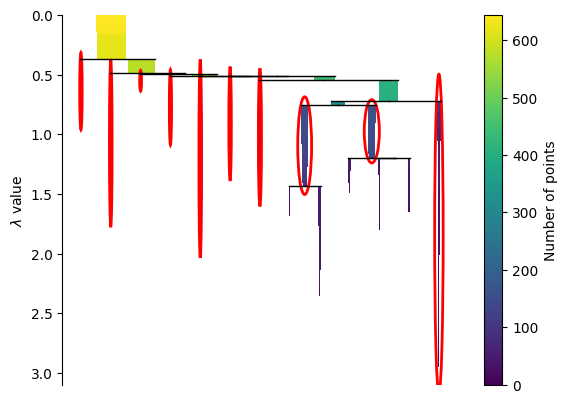

In [35]:
hdbscan_model.condensed_tree_.plot(select_clusters=True)

In [36]:
import plotly.express as px

In [37]:
assert len(topics) == len(data)

In [38]:
data['Topic'] = topics

In [39]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Topic
0,diabetes_t2,05/12/2023,05/12/2023 23:25,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,yep i’m in the same boat. my local pharmacy ch...,it's comparable to strips. i go through roughl...,,,,cheapest way get cgm without insurance well ...,0
1,diabetes_t2,20/12/2023,20/12/2023 05:13,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,"i don’t usually have this issue, but sometimes...",,,,,libre doesn’ stick ’ used the libre for mon...,-1
2,diabetes_t2,23/12/2023,23/12/2023 23:16,frustrated with libre 3,i just got off the phone with customer support...,the first twelve hours of readings are always ...,,,,,frustrated with libre just got off the phone...,0
3,diabetes_t2,23/12/2023,23/12/2023 02:32,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,i had numbers like yours when i started the li...,thank you! you as well. i had no clue that i e...,,,,libre graphs weeks the first graph was fir...,0
4,diabetes_t2,07/12/2023,07/12/2023 16:34,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,here's more than you ever wanted to know about...,thank you! that is very informative and just t...,,,,confused gmi libre finding myself confused...,1


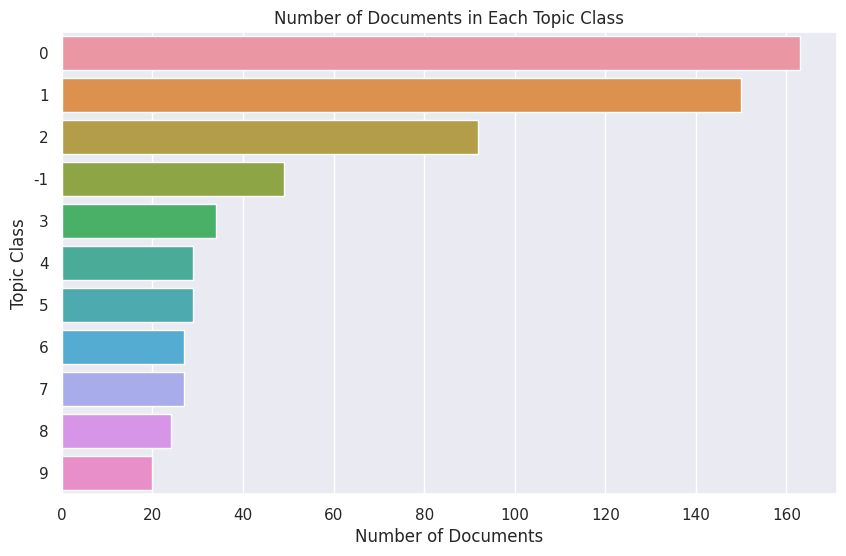

In [40]:
topic_counts = data['Topic'].value_counts()

# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='Topic', data=df, order = topic_counts.index)

# Labeling the plot
plt.title('Number of Documents in Each Topic Class')
plt.xlabel('Number of Documents')
plt.ylabel('Topic Class')

# Show the plot
plt.show()

In [41]:
BERTopic_model.visualize_distribution(probs[1])

In [42]:
topic_distr, topic_token_distr = BERTopic_model.approximate_distribution(texts, calculate_tokens=True)
BERTopic_model.visualize_approximate_distribution(texts[1], topic_token_distr[1])


100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


,libre,doesn,stick,used,the,libre,for,months,off,and,wish,had,more,consistently,but,never,had,unit,stay,more,than,days,been,frustrating,they,never,come,off,because,any,force,accident,they,just,become,loose,pregnant,now,and,would,like,able,wear,cgm,for,the,duration,pregnancy,what,gives,please,send,any,advice
0_low_glucose_blood_days,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.114,0.114,0.114,0.114,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1_time_days_low_finger,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.121,0.121,0.121,0.121,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


# **BERTopic Model Output Evaluation**

# **Coherence**
Measures the degree of semantic similarity between high scoring words in the topic. These measures help distinguish between topics that are semantically interpretable and topics that are artifacts of statistical inference.

C_V Measure: A coherence measure that uses a sliding window, a one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity.

In [45]:
coherence = BERTopic_model.get_topic_info(); coherence.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,49,-1_alarm_alarms_transmitter_low,"[alarm, alarms, transmitter, low, new, phone, ...",[brand new iphone signal loss every mins j...
1,0,163,0_low_glucose_blood_days,"[low, glucose, blood, days, using, night, day,...",[this sensor fing idding with ive been usin...
2,1,150,1_time_days_low_finger,"[time, days, low, finger, blood, really, mgdl,...",[fake lows and highs while sleep tells random...
3,2,92,2_phone_iphone_ios_scan,"[phone, iphone, ios, scan, update, reader, wat...",[question cannot scan the sensor from ouside ...
4,3,34,3_arm_put_pain_right,"[arm, put, pain, right, placement, left, left ...",[pain when putting new sensor fsl does anyone...
5,4,29,4_blood_reading_phone_scan,"[blood, reading, phone, scan, time, else, erro...",[where told use freestyle libre with cat o...
6,5,29,5_signal_loss_signal loss_phone,"[signal, loss, signal loss, phone, hours, blue...",[persistent signal loss freestyle libre hey ...
7,6,27,6_replace_new_message_phone,"[replace, new, message, phone, failure, consta...",[time give freestyle libre sensor after hav...
8,7,27,7_low_new_sugar_glucose,"[low, new, sugar, glucose, compression, blood,...",[new sensor placement last night hrs ago cha...
9,8,24,8_alarm_remains_glucose_low,"[alarm, remains, glucose, low, blood, change, ...",[libre any hacks disable the urgent low glu...


In [46]:
coherence

,Topic,Count,Name,Representation,Representative_Docs
0,-1,49,-1_alarm_alarms_transmitter_low,"[alarm, alarms, transmitter, low, new, phone, ...",[brand new iphone signal loss every mins j...
1,0,163,0_low_glucose_blood_days,"[low, glucose, blood, days, using, night, day,...",[this sensor fing idding with ive been usin...
2,1,150,1_time_days_low_finger,"[time, days, low, finger, blood, really, mgdl,...",[fake lows and highs while sleep tells random...
3,2,92,2_phone_iphone_ios_scan,"[phone, iphone, ios, scan, update, reader, wat...",[question cannot scan the sensor from ouside ...
4,3,34,3_arm_put_pain_right,"[arm, put, pain, right, placement, left, left ...",[pain when putting new sensor fsl does anyone...
5,4,29,4_blood_reading_phone_scan,"[blood, reading, phone, scan, time, else, erro...",[where told use freestyle libre with cat o...
6,5,29,5_signal_loss_signal loss_phone,"[signal, loss, signal loss, phone, hours, blue...",[persistent signal loss freestyle libre hey ...
7,6,27,6_replace_new_message_phone,"[replace, new, message, phone, failure, consta...",[time give freestyle libre sensor after hav...
8,7,27,7_low_new_sugar_glucose,"[low, new, sugar, glucose, compression, blood,...",[new sensor placement last night hrs ago cha...
9,8,24,8_alarm_remains_glucose_low,"[alarm, remains, glucose, low, blood, change, ...",[libre any hacks disable the urgent low glu...


In [ ]:
data.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Model Outputs.xlsx')

# **Generating Labels from Topic Representations using 🤗Transformers**

In [82]:
from bertopic.representation import TextGeneration
from transformers import pipeline

In [103]:
keywords_list = coherence['Representation'].tolist()
generator = pipeline('text2text-generation', model='google/flan-t5-base')

In [104]:
def generate_labels(keywords):
    labels = []
    for keyword in keywords:
        # Replace the placeholder with the actual keyword
        prompt = f"I have a topic represented by the following keyword: {keyword}. Considering heavily the context of Diabetic users of Continuous Glucose Monitoring sensors, where these keywords are from Reddit posts about Continuous Glucose Monitoring sensors, which Diabetics use to help them manage their condition; Summarise the specific nuance described by the representation."
        result = generator(prompt, max_length=50)
        labels.append(result[0]['generated_text'])
    return labels


In [105]:
topic_labels = generate_labels(keywords_list)

In [106]:
topic_labels

['Alarms, low, new, cant, wake',
 'Continuous glucose monitoring sensors are used to monitor blood glucose levels.',
 'Diabetic users of Continuous Glucose Monitoring sensors',
 'Continuous Glucose Monitoring Sensors',
 'Diabetic users of Continuous Glucose Monitoring sensors',
 'Diabetic users of Continuous Glucose Monitoring sensors',
 'Diabetic users of Continuous Glucose Monitoring sensors',
 'Diabetic users of Continuous Glucose Monitoring sensors',
 'Diabetic users of Continuous Glucose Monitoring sensors',
 'Continuous Glucose Monitoring sensors are used to monitor blood sugar levels.',
 'Diabetic users of Continuous Glucose Monitoring sensors need access to a mobile device to monitor their glucose levels.']

In [87]:
#prompt = "I have a topic represented by the following keywords: [KEYWORDS]. Considering heavily the context of Diabetic users of Continuous Glucose Monitoring sensors, what is this topic about?"

# Create your representation model
#generator = pipeline('text2text-generation', model='google/flan-t5-base')
#representation_model = TextGeneration(generator, random_state = 42)

# **Topic Overlap**
 Refers to the extent to which topics share the same words. Overlapping topics might suggest that the model is not differentiating topics from each other well.

There is no direct function in BERTopic for measuring overlap, but you can infer it by examining the most important words per topic and see if there are common words across different topics.